In [85]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [86]:
gdf1 = gpd.read_file('acs2019_5yr_B01003_14000US06037222001.geojson')

In [87]:
gdf2 = gpd.read_file('acs2019_5yr_B05007.geojson')

In [88]:
gdf1.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [89]:
gdf2.head()

,geoid,name,B05007001,"B05007001, Error",B05007002,"B05007002, Error",B05007003,"B05007003, Error",B05007004,"B05007004, Error",B05007005,"B05007005, Error",B05007006,"B05007006, Error",B05007007,"B05007007, Error",B05007008,"B05007008, Error",B05007009,"B05007009, Error",B05007010,"B05007010, Error",B05007011,"B05007011, Error",B05007012,"B05007012, Error",B05007013,"B05007013, Error",B05007014,"B05007014, Error",B05007015,"B05007015, Error",B05007016,"B05007016, Error",B05007017,"B05007017, Error",B05007018,"B05007018, Error",B05007019,"B05007019, Error",B05007020,"B05007020, Error",B05007021,"B05007021, Error",B05007022,"B05007022, Error",B05007023,"B05007023, Error",B05007024,"B05007024, Error",B05007025,"B05007025, Error",B05007026,"B05007026, Error",B05007027,"B05007027, Error",B05007028,"B05007028, Error",B05007029,"B05007029, Error",B05007030,"B05007030, Error",B05007031,"B05007031, Error",B05007032,"B05007032, Error",B05007033,"B05007033, Error",B05007034,"B05007034, Error",B05007035,"B05007035, Error",B05007036,"B05007036, Error",B05007037,"B05007037, Error",B05007038,"B05007038, Error",B05007039,"B05007039, Error",B05007040,"B05007040, Error",B05007041,"B05007041, Error",B05007042,"B05007042, Error",B05007043,"B05007043, Error",B05007044,"B05007044, Error",B05007045,"B05007045, Error",B05007046,"B05007046, Error",B05007047,"B05007047, Error",B05007048,"B05007048, Error",B05007049,"B05007049, Error",B05007050,"B05007050, Error",B05007051,"B05007051, Error",B05007052,"B05007052, Error",B05007053,"B05007053, Error",B05007054,"B05007054, Error",B05007055,"B05007055, Error",B05007056,"B05007056, Error",B05007057,"B05007057, Error",B05007058,"B05007058, Error",B05007059,"B05007059, Error",B05007060,"B05007060, Error",B05007061,"B05007061, Error",B05007062,"B05007062, Error",B05007063,"B05007063, Error",B05007064,"B05007064, Error",B05007065,"B05007065, Error",B05007066,"B05007066, Error",B05007067,"B05007067, Error",B05007068,"B05007068, Error",B05007069,"B05007069, Error",B05007070,"B05007070, Error",B05007071,"B05007071, Error",B05007072,"B05007072, Error",B05007073,"B05007073, Error",B05007074,"B05007074, Error",B05007075,"B05007075, Error",B05007076,"B05007076, Error",B05007077,"B05007077, Error",B05007078,"B05007078, Error",B05007079,"B05007079, Error",B05007080,"B05007080, Error",B05007081,"B05007081, Error",B05007082,"B05007082, Error",B05007083,"B05007083, Error",B05007084,"B05007084, Error",B05007085,"B05007085, Error",B05007086,"B05007086, Error",B05007087,"B05007087, Error",B05007088,"B05007088, Error",B05007089,"B05007089, Error",B05007090,"B05007090, Error",B05007091,"B05007091, Error",B05007092,"B05007092, Error",B05007093,"B05007093, Error",B05007094,"B05007094, Error",B05007095,"B05007095, Error",B05007096,"B05007096, Error",B05007097,"B05007097, Error",B05007098,"B05007098, Error",B05007099,"B05007099, Error",B05007100,"B05007100, Error",B05007101,"B05007101, Error",B05007102,"B05007102, Error",B05007103,"B05007103, Error",B05007104,"B05007104, Error",B05007105,"B05007105, Error",B05007106,"B05007106, Error",geometry
0,05000US06037,"Los Angeles County, CA",3430535.0,14118.0,441555.0,6639.0,54213.0,1710.0,387342.0,6344.0,721208.0,7344.0,251291.0,4294.0,469917.0,6396.0,772137.0,6977.0,377109.0,4754.0,395028.0,5522.0,1495635.0,6945.0,1110151.0,6628.0,385484.0,4524.0,169843.0,3798.0,34581.0,1911.0,3252.0,477.0,31329.0,1849.0,27613.0,1395.0,15075.0,977.0,12538.0,904.0,37943.0,1700.0,30658.0,1521.0,7285.0,525.0,69706.0,2024.0,58367.0,1691.0,11339.0,861.0,1225004.0,8505.0,230109.0,4546.0,31858.0,1355.0,198251.0,4375.0,268212.0,4601.0,158716.0,3522.0,109496.0,2563.0,247016.0,3990.0,200927.0,3203.0,46089.0,1816.0,479667.0,4580.0,442067.0,4441.0,37600.0,1439.0,1931573.0,10078.0,31676.0,1628.0,2821.0,557.0,375.0,146.0,2446.0,512.0,3733.0,550.0,2233.0,376.0,1500.0,383.0,4017.0,517.0,2809.0,386.0,1208.0,281.0,21105.0,1249.0,17715.0,1096.0,3390.0,454.0,1803371.0,10220.0,1277142.0,9235.0,65416.0,2586.0,8709.0,815.0,5670

In [90]:
gdf1 = gdf1.drop([0])

In [91]:
gdf2 = gdf2.drop([0])

In [92]:
gdf1.head()

,geoid,name,B01003001,"B01003001, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [93]:
gdf2.head()

,geoid,name,B05007001,"B05007001, Error",B05007002,"B05007002, Error",B05007003,"B05007003, Error",B05007004,"B05007004, Error",B05007005,"B05007005, Error",B05007006,"B05007006, Error",B05007007,"B05007007, Error",B05007008,"B05007008, Error",B05007009,"B05007009, Error",B05007010,"B05007010, Error",B05007011,"B05007011, Error",B05007012,"B05007012, Error",B05007013,"B05007013, Error",B05007014,"B05007014, Error",B05007015,"B05007015, Error",B05007016,"B05007016, Error",B05007017,"B05007017, Error",B05007018,"B05007018, Error",B05007019,"B05007019, Error",B05007020,"B05007020, Error",B05007021,"B05007021, Error",B05007022,"B05007022, Error",B05007023,"B05007023, Error",B05007024,"B05007024, Error",B05007025,"B05007025, Error",B05007026,"B05007026, Error",B05007027,"B05007027, Error",B05007028,"B05007028, Error",B05007029,"B05007029, Error",B05007030,"B05007030, Error",B05007031,"B05007031, Error",B05007032,"B05007032, Error",B05007033,"B05007033, Error",B05007034,"B05007034, Error",B05007035,"B05007035, Error",B05007036,"B05007036, Error",B05007037,"B05007037, Error",B05007038,"B05007038, Error",B05007039,"B05007039, Error",B05007040,"B05007040, Error",B05007041,"B05007041, Error",B05007042,"B05007042, Error",B05007043,"B05007043, Error",B05007044,"B05007044, Error",B05007045,"B05007045, Error",B05007046,"B05007046, Error",B05007047,"B05007047, Error",B05007048,"B05007048, Error",B05007049,"B05007049, Error",B05007050,"B05007050, Error",B05007051,"B05007051, Error",B05007052,"B05007052, Error",B05007053,"B05007053, Error",B05007054,"B05007054, Error",B05007055,"B05007055, Error",B05007056,"B05007056, Error",B05007057,"B05007057, Error",B05007058,"B05007058, Error",B05007059,"B05007059, Error",B05007060,"B05007060, Error",B05007061,"B05007061, Error",B05007062,"B05007062, Error",B05007063,"B05007063, Error",B05007064,"B05007064, Error",B05007065,"B05007065, Error",B05007066,"B05007066, Error",B05007067,"B05007067, Error",B05007068,"B05007068, Error",B05007069,"B05007069, Error",B05007070,"B05007070, Error",B05007071,"B05007071, Error",B05007072,"B05007072, Error",B05007073,"B05007073, Error",B05007074,"B05007074, Error",B05007075,"B05007075, Error",B05007076,"B05007076, Error",B05007077,"B05007077, Error",B05007078,"B05007078, Error",B05007079,"B05007079, Error",B05007080,"B05007080, Error",B05007081,"B05007081, Error",B05007082,"B05007082, Error",B05007083,"B05007083, Error",B05007084,"B05007084, Error",B05007085,"B05007085, Error",B05007086,"B05007086, Error",B05007087,"B05007087, Error",B05007088,"B05007088, Error",B05007089,"B05007089, Error",B05007090,"B05007090, Error",B05007091,"B05007091, Error",B05007092,"B05007092, Error",B05007093,"B05007093, Error",B05007094,"B05007094, Error",B05007095,"B05007095, Error",B05007096,"B05007096, Error",B05007097,"B05007097, Error",B05007098,"B05007098, Error",B05007099,"B05007099, Error",B05007100,"B05007100, Error",B05007101,"B05007101, Error",B05007102,"B05007102, Error",B05007103,"B05007103, Error",B05007104,"B05007104, Error",B05007105,"B05007105, Error",B05007106,"B05007106, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,326.0,217.0,129.0,63.0,66.0,154.0,126.0,363.0,186.0,163.0,100.0,200.0,152.0,333.0,163.0,230.0,111.0,103.0,110.0,511.0,174.0,428.0,154.0,83.0,71.0,131.0,114.0,7.0,14.0,0.0,12.0,7.0,14.0,0.0,12.0,0.0,12.0,0.0,12.0,101.0,109.0,22.0,34.0,79.0,102.0,23.0,25.0,13.0,19.0,10.0,15.0,818.0,229.0,160.0,114.0,60.0,66.0,100.0,111.0,243.0,139.0,163.0,100.0,80.0,55.0,181.0,112.0,168.0,106.0,13.0,19.0,234.0,108.0,230.0,109.0,4.0,6.0,446.0,239.0,8.0,13.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,8.0,13.0,0.0,12.0,329.0,219.0,310.0,218.0,26.0,37.0,3.0,6.0,23.0,36.0,120.0,144.0,0.0,12.0,120.0,144.0,25.0,42.0,25.0,42.0,0.0,12.0,139.0,116.0,118.0,93.0,21.0,32.0,19.0,28.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,8.0,13.0,0.0,12.0,11.0,16.0,8.0,15.0,3.0,6.0,109.0,99.0,24.0,36.0,0

In [94]:
acs19 = gdf2.merge(gdf1,on = ['geoid'])

In [95]:
acs19.head()

,geoid,name_x,B05007001,"B05007001, Error",B05007002,"B05007002, Error",B05007003,"B05007003, Error",B05007004,"B05007004, Error",B05007005,"B05007005, Error",B05007006,"B05007006, Error",B05007007,"B05007007, Error",B05007008,"B05007008, Error",B05007009,"B05007009, Error",B05007010,"B05007010, Error",B05007011,"B05007011, Error",B05007012,"B05007012, Error",B05007013,"B05007013, Error",B05007014,"B05007014, Error",B05007015,"B05007015, Error",B05007016,"B05007016, Error",B05007017,"B05007017, Error",B05007018,"B05007018, Error",B05007019,"B05007019, Error",B05007020,"B05007020, Error",B05007021,"B05007021, Error",B05007022,"B05007022, Error",B05007023,"B05007023, Error",B05007024,"B05007024, Error",B05007025,"B05007025, Error",B05007026,"B05007026, Error",B05007027,"B05007027, Error",B05007028,"B05007028, Error",B05007029,"B05007029, Error",B05007030,"B05007030, Error",B05007031,"B05007031, Error",B05007032,"B05007032, Error",B05007033,"B05007033, Error",B05007034,"B05007034, Error",B05007035,"B05007035, Error",B05007036,"B05007036, Error",B05007037,"B05007037, Error",B05007038,"B05007038, Error",B05007039,"B05007039, Error",B05007040,"B05007040, Error",B05007041,"B05007041, Error",B05007042,"B05007042, Error",B05007043,"B05007043, Error",B05007044,"B05007044, Error",B05007045,"B05007045, Error",B05007046,"B05007046, Error",B05007047,"B05007047, Error",B05007048,"B05007048, Error",B05007049,"B05007049, Error",B05007050,"B05007050, Error",B05007051,"B05007051, Error",B05007052,"B05007052, Error",B05007053,"B05007053, Error",B05007054,"B05007054, Error",B05007055,"B05007055, Error",B05007056,"B05007056, Error",B05007057,"B05007057, Error",B05007058,"B05007058, Error",B05007059,"B05007059, Error",B05007060,"B05007060, Error",B05007061,"B05007061, Error",B05007062,"B05007062, Error",B05007063,"B05007063, Error",B05007064,"B05007064, Error",B05007065,"B05007065, Error",B05007066,"B05007066, Error",B05007067,"B05007067, Error",B05007068,"B05007068, Error",B05007069,"B05007069, Error",B05007070,"B05007070, Error",B05007071,"B05007071, Error",B05007072,"B05007072, Error",B05007073,"B05007073, Error",B05007074,"B05007074, Error",B05007075,"B05007075, Error",B05007076,"B05007076, Error",B05007077,"B05007077, Error",B05007078,"B05007078, Error",B05007079,"B05007079, Error",B05007080,"B05007080, Error",B05007081,"B05007081, Error",B05007082,"B05007082, Error",B05007083,"B05007083, Error",B05007084,"B05007084, Error",B05007085,"B05007085, Error",B05007086,"B05007086, Error",B05007087,"B05007087, Error",B05007088,"B05007088, Error",B05007089,"B05007089, Error",B05007090,"B05007090, Error",B05007091,"B05007091, Error",B05007092,"B05007092, Error",B05007093,"B05007093, Error",B05007094,"B05007094, Error",B05007095,"B05007095, Error",B05007096,"B05007096, Error",B05007097,"B05007097, Error",B05007098,"B05007098, Error",B05007099,"B05007099, Error",B05007100,"B05007100, Error",B05007101,"B05007101, Error",B05007102,"B05007102, Error",B05007103,"B05007103, Error",B05007104,"B05007104, Error",B05007105,"B05007105, Error",B05007106,"B05007106, Error",geometry_x,name_y,B01003001,"B01003001, Error",geometry_y
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,326.0,217.0,129.0,63.0,66.0,154.0,126.0,363.0,186.0,163.0,100.0,200.0,152.0,333.0,163.0,230.0,111.0,103.0,110.0,511.0,174.0,428.0,154.0,83.0,71.0,131.0,114.0,7.0,14.0,0.0,12.0,7.0,14.0,0.0,12.0,0.0,12.0,0.0,12.0,101.0,109.0,22.0,34.0,79.0,102.0,23.0,25.0,13.0,19.0,10.0,15.0,818.0,229.0,160.0,114.0,60.0,66.0,100.0,111.0,243.0,139.0,163.0,100.0,80.0,55.0,181.0,112.0,168.0,106.0,13.0,19.0,234.0,108.0,230.0,109.0,4.0,6.0,446.0,239.0,8.0,13.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,8.0,13.0,0.0,12.0,329.0,219.0,310.0,218.0,26.0,37.0,3.0,6.0,23.0,36.0,120.0,144.0,0.0,12.0,120.0,144.0,25.0,42.0,25.0,42.0,0.0,12.0,139.0,116.0,118.0,93.0,21.0,32.0,19.0,28.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,8.0,13.0,8.0,13.0,0.0,12.

In [96]:
acs19 = acs19[['geoid', 
               'name_x', 
               'B01003001', 
               'B05007001', 
               'B05007002', 
               'B05007014', 
               'B05007015',  
               'B05007027', 
               'B05007028', 
               'B05007040', 
               'B05007041', 
               'B05007042', 
               'B05007054', 
               'B05007055', 
               'B05007056',
               'B05007068', 
               'B05007069', 
               'B05007081', 
               'B05007082', 
               'B05007094', 
               'B05007095', 
               'geometry_y']
             ] 
               

In [97]:
acs19.head()

,geoid,name_x,B01003001,B05007001,B05007002,B05007014,B05007015,B05007027,B05007028,B05007040,B05007041,B05007042,B05007054,B05007055,B05007056,B05007068,B05007069,B05007081,B05007082,B05007094,B05007095,geometry_y
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [98]:
acs19.columns = ['FIPS', 
                 'Census Tract', 
                 '19 Total Population', 
                 '19 Total Foreign Born',
                 '19 Total Entered 2010 or later', 
                 '19 Europe', 
                 '19 Europe Entered 2010 or later', 
                 '19 Asia', 
                 '19 Asia Entered 2010 or later', 
                 '19 Latin America', 
                 '19 Caribbean', 
                 '19 Caribbean entered 2010 or later', 
                 '19 Central America', 
                 '19 Mexico', 
                 '19 Mexico Entered 2010 or later', 
                 '19 Other Central America', 
                 '19 Other Central America Entered 2010 or later', 
                 '19 South America', 
                 '19 South America Entered 2010 or later', 
                 '19 Other Areas', 
                 '19 Other Areas Entered 2010 or later', 
                 'Geometry']
                 

In [99]:
acs19.head()

,FIPS,Census Tract,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,Geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [100]:
acs19['FIPS'] = acs19['FIPS'].str.replace('14000US','')

In [101]:
acs19.head()

,FIPS,Census Tract,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,Geometry
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [102]:
df1 = pd.read_csv('ACSDT5Y2011.B05007_data_with_overlays_2022-02-20T144252.csv')

In [103]:
df2 = pd.read_csv('ACSDT5Y2011.B01003_data_with_overlays_2022-02-18T183522.csv')

In [104]:
df1.head()

,B05007_001E,B05007_001M,B05007_002E,B05007_002M,B05007_003E,B05007_003M,B05007_004E,B05007_004M,B05007_005E,B05007_005M,B05007_006E,B05007_006M,B05007_007E,B05007_007M,B05007_008E,B05007_008M,B05007_009E,B05007_009M,B05007_010E,B05007_010M,B05007_011E,B05007_011M,B05007_012E,B05007_012M,B05007_013E,B05007_013M,B05007_014E,B05007_014M,B05007_015E,B05007_015M,B05007_016E,B05007_016M,B05007_017E,B05007_017M,B05007_018E,B05007_018M,B05007_019E,B05007_019M,B05007_020E,B05007_020M,B05007_021E,B05007_021M,B05007_022E,B05007_022M,B05007_023E,B05007_023M,B05007_024E,B05007_024M,B05007_025E,B05007_025M,B05007_026E,B05007_026M,B05007_027E,B05007_027M,B05007_028E,B05007_028M,B05007_029E,B05007_029M,B05007_030E,B05007_030M,B05007_031E,B05007_031M,B05007_032E,B05007_032M,B05007_033E,B05007_033M,B05007_034E,B05007_034M,B05007_035E,B05007_035M,B05007_036E,B05007_036M,B05007_037E,B05007_037M,B05007_038E,B05007_038M,B05007_039E,B05007_039M,B05007_040E,B05007_040M,B05007_041E,B05007_041M,B05007_042E,B05007_042M,B05007_043E,B05007_043M,B05007_044E,B05007_044M,B05007_045E,B05007_045M,B05007_046E,B05007_046M,B05007_047E,B05007_047M,B05007_048E,B05007_048M,B05007_049E,B05007_049M,B05007_050E,B05007_050M,B05007_051E,B05007_051M,B05007_052E,B05007_052M,B05007_053E,B05007_053M,B05007_054E,B05007_054M,B05007_055E,B05007_055M,B05007_056E,B05007_056M,B05007_057E,B05007_057M,B05007_058E,B05007_058M,B05007_059E,B05007_059M,B05007_060E,B05007_060M,B05007_061E,B05007_061M,B05007_062E,B05007_062M,B05007_063E,B05007_063M,B05007_064E,B05007_064M,B05007_065E,B05007_065M,B05007_066E,B05007_066M,B05007_067E,B05007_067M,B05007_068E,B05007_068M,B05007_069E,B05007_069M,B05007_070E,B05007_070M,B05007_071E,B05007_071M,B05007_072E,B05007_072M,B05007_073E,B05007_073M,B05007_074E,B05007_074M,B05007_075E,B05007_075M,B05007_076E,B05007_076M,B05007_077E,B05007_077M,B05007_078E,B05007_078M,B05007_079E,B05007_079M,B05007_080E,B05007_080M,B05007_081E,B05007_081M,B05007_082E,B05007_082M,B05007_083E,B05007_083M,B05007_084E,B05007_084M,B05007_085E,B05007_085M,B05007_086E,B05007_086M,B05007_087E,B05007_087M,B05007_088E,B05007_088M,B05007_089E,B05007_089M,B05007_090E,B05007_090M,B05007_091E,B05007_091M,B05007_092E,B05007_092M,B05007_093E,B05007_093M,B05007_094E,B05007_094M,GEO_ID,NAME
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Europe,Margin of Error!!Total!!Europe,Estimate!!Total!!Europe!!Entered 2000 or later,Margin of Error!!Total!!Europe!!Entered 2000 o...,Estimate!!Total!!Europe!!Entered 2000 or later...,Margin of Error!!Total!!Europe!!Entered 2000 o...,Estimate!!Total!!Europe!!Entered 2000 or later...,Margin of Error!!Total!!Europe!!Entered 2000 o...,Estimate!!Total!!Europe!!Entered 1990 to 1999,Margin of Error!!Total!!Europe!!Entered 1990 t...,Estimate!!Total!!Europe!!Entered 1990 to 1999!...,Margin of Error!!Total!!Europe!!Entered 1990 t...,Estimate!!Total!!Europe!!Entered 1990 to 1999!...,Margin of Error!!Total!!Europe!!Entered 1990 t...,Estimate!!Total!!Europe!!Entered 1980 to 1989,Margin of Error!!Total!!Europe!!Entered 1980 t...,Estimate!!Total!!Europe!!Entered 1980 to 1989!...,Margin of Error!!Total!!Europe!!Entered 1980 t...,Estimate!!Total!!Europe!!Entered 1980 to 1989!...,Margin of Error!!Total!!Europe!!Entered 1980 t...,Estimate!!Total!!Europe!!Entered before 1980,Margin of Error!!Total!!Europe!!Entered before...,Estimate!!Total!!Europe!!Entered before 1980!!...,Margin of Error!!Total!!Europe!!Entered before...,Estimate!!Total!!Europe!!Entered before 1980!!...,Margin of Error!!Total!!Europe!!Entered before...,Estimate!!Total!!Asia,Margin of Error!!Total!!Asia,Estimate!!Total!!Asia!!Entered 2000 or later,Margin of Error!!Total!!Asia!!Entered 2000 or ...,Estimate!!Total!!Asia!!Entered 2000 or later!!...,Margin of Error!!Total!!Asia!!Entered 2000 or ...,Estimate!!Total!!Asia!!Entered 2000 or later!!...,Margin of Error!!Total!!Asia!!Entered 2000 or ...,Estimate!!Total!!Asia!!Entered 1990 to 1999,Margin of Error!!Total!!Asia!!Entered 1990 to ...,Estimate!!T

In [105]:
ctk = ['B05007_001E', 
       'B05007_002E',
       'B05007_003E', 
       'B05007_015E', 
       'B05007_016E', 
       'B05007_028E', 
       'B05007_029E', 
       'B05007_030E', 
       'B05007_042E', 
       'B05007_043E', 
       'B05007_044E', 
       'B05007_056E', 
       'B05007_057E', 
       'B05007_069E', 
       'B05007_070E', 
       'B05007_082E', 
       'B05007_083E', 
       'GEO_ID'
        ]

In [106]:
df1 = df1[ctk]

In [107]:
df1.head()

,B05007_001E,B05007_002E,B05007_003E,B05007_015E,B05007_016E,B05007_028E,B05007_029E,B05007_030E,B05007_042E,B05007_043E,B05007_044E,B05007_056E,B05007_057E,B05007_069E,B05007_070E,B05007_082E,B05007_083E,GEO_ID
0,Estimate!!Total,Estimate!!Total!!Europe,Estimate!!Total!!Europe!!Entered 2000 or later,Estimate!!Total!!Asia,Estimate!!Total!!Asia!!Entered 2000 or later,Estimate!!Total!!Latin America,Estimate!!Total!!Latin America!!Caribbean,Estimate!!Total!!Latin America!!Caribbean!!Ent...,Estimate!!Total!!Latin America!!Central America,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!South America,Estimate!!Total!!Latin America!!South America!...,Estimate!!Total!!Other areas,Estimate!!Total!!Other areas!!Entered 2000 or ...,id
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,1400000US06037101110
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,1400000US06037101122
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,1400000US06037101210
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,1400000US06037101220


In [108]:
df1.columns = ['11 Total Foreign Born', 
               '11 Total Europe', 
               '11 Total Europe Entered 2000 or later', 
               '11 Total Asia', 
               '11 Total Asia Entered 2000 or later', 
               '11 Total Latin America', 
               '11 Total Caribbean', 
               '11 Total Caribbean Entered 2000 or later', 
               '11 Total Central America',  
               '11 Total Mexico', 
               '11 Total Mexico Entered 2000 or later', 
               '11 Total Other Central America', 
               '11 Total Other Central America 2000 or later', 
               '11 Total South America', 
               '11 Total South America Entered 2000 or later', 
               '11 Total Other areas', 
               '11 Total Other areas Entered 2000 or later', 
               'FIPS']

In [109]:
df1.head()

,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS
0,Estimate!!Total,Estimate!!Total!!Europe,Estimate!!Total!!Europe!!Entered 2000 or later,Estimate!!Total!!Asia,Estimate!!Total!!Asia!!Entered 2000 or later,Estimate!!Total!!Latin America,Estimate!!Total!!Latin America!!Caribbean,Estimate!!Total!!Latin America!!Caribbean!!Ent...,Estimate!!Total!!Latin America!!Central America,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!Central Americ...,Estimate!!Total!!Latin America!!South America,Estimate!!Total!!Latin America!!South America!...,Estimate!!Total!!Other areas,Estimate!!Total!!Other areas!!Entered 2000 or ...,id
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,1400000US06037101110
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,1400000US06037101122
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,1400000US06037101210
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,1400000US06037101220


In [110]:
df1 = df1.drop([0])

In [111]:
df1.head()

,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,1400000US06037101110
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,1400000US06037101122
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,1400000US06037101210
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,1400000US06037101220
5,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,1400000US06037101300


In [112]:
df1['FIPS'] = df1['FIPS'].str.replace('1400000US','')

In [113]:
df1.head()

,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,06037101110
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,06037101122
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,06037101210
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,06037101220
5,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,06037101300


In [114]:
column_list = list(df1)

In [115]:
print(column_list)

['11 Total Foreign Born', '11 Total Europe', '11 Total Europe Entered 2000 or later', '11 Total Asia', '11 Total Asia Entered 2000 or later', '11 Total Latin America', '11 Total Caribbean', '11 Total Caribbean Entered 2000 or later', '11 Total Central America', '11 Total Mexico', '11 Total Mexico Entered 2000 or later', '11 Total Other Central America', '11 Total Other Central America 2000 or later', '11 Total South America', '11 Total South America Entered 2000 or later', '11 Total Other areas', '11 Total Other areas Entered 2000 or later', 'FIPS']


In [116]:
column_list = ['11 Total Europe Entered 2000 or later', '11 Total Asia Entered 2000 or later', '11 Total Caribbean Entered 2000 or later', '11 Total Mexico Entered 2000 or later', '11 Total Other Central America 2000 or later', '11 Total South America Entered 2000 or later', '11 Total Other areas Entered 2000 or later']

In [117]:
print(column_list)

['11 Total Europe Entered 2000 or later', '11 Total Asia Entered 2000 or later', '11 Total Caribbean Entered 2000 or later', '11 Total Mexico Entered 2000 or later', '11 Total Other Central America 2000 or later', '11 Total South America Entered 2000 or later', '11 Total Other areas Entered 2000 or later']


In [118]:
df1["sum"] = df1[column_list].sum(axis=1)

In [119]:
df1.head()

,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS,sum
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,06037101110,1.530304e+11
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,06037101122,8.700000e+06
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,06037101210,5.610655e+11
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,06037101220,9.807801e+08
5,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,06037101300,1.410000e+08


In [120]:
df1 = df1.rename(columns={'sum': '11 Total Entered 2000 or later'})

In [121]:
df1.head()

,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS,11 Total Entered 2000 or later
1,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,06037101110,1.530304e+11
2,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,06037101122,8.700000e+06
3,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,06037101210,5.610655e+11
4,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,06037101220,9.807801e+08
5,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,06037101300,1.410000e+08


In [122]:
df1 = df1[['11 Total Foreign Born', 
           '11 Total Entered 2000 or later', 
           '11 Total Europe', 
           '11 Total Europe Entered 2000 or later', 
           '11 Total Asia', '11 Total Asia Entered 2000 or later', 
           '11 Total Latin America', '11 Total Caribbean', 
           '11 Total Caribbean Entered 2000 or later', 
           '11 Total Central America', '11 Total Mexico', 
           '11 Total Mexico Entered 2000 or later', 
           '11 Total Other Central America', 
           '11 Total Other Central America 2000 or later', 
           '11 Total South America', 
           '11 Total South America Entered 2000 or later', 
           '11 Total Other areas', 
           '11 Total Other areas Entered 2000 or later', 
           'FIPS']]

In [123]:
df1.head()

,11 Total Foreign Born,11 Total Entered 2000 or later,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS
1,2027,1.530304e+11,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,06037101110
2,1254,8.700000e+06,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,06037101122
3,3471,5.610655e+11,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,06037101210
4,1242,9.807801e+08,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,06037101220
5,1374,1.410000e+08,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,06037101300


In [124]:
df2.head()

,B01003_001E,B01003_001M,GEO_ID,NAME
0,Estimate!!Total,Margin of Error!!Total,id,Geographic Area Name
1,5012,424,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali..."
2,3584,388,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali..."
3,6529,533,1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali..."
4,2751,319,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali..."


In [125]:
ctk2 = ['B01003_001E', 
        'GEO_ID']

In [126]:
df2 = df2[ctk2]

In [127]:
df2.head()

,B01003_001E,GEO_ID
0,Estimate!!Total,id
1,5012,1400000US06037101110
2,3584,1400000US06037101122
3,6529,1400000US06037101210
4,2751,1400000US06037101220


In [128]:
df2.columns = ['11 Total Population', 
               'FIPS']

In [129]:
df2 = df2.drop([0])

In [130]:
df2.head()

,11 Total Population,FIPS
1,5012,1400000US06037101110
2,3584,1400000US06037101122
3,6529,1400000US06037101210
4,2751,1400000US06037101220
5,4123,1400000US06037101300


In [131]:
df2['FIPS'] = df2['FIPS'].str.replace('1400000US','')

In [132]:
df2.head()

,11 Total Population,FIPS
1,5012,06037101110
2,3584,06037101122
3,6529,06037101210
4,2751,06037101220
5,4123,06037101300


In [133]:
acs11 = df1.merge(df2, on='FIPS')

In [134]:
acs11

,11 Total Foreign Born,11 Total Entered 2000 or later,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,FIPS,11 Total Population
0,2027,1.530304e+11,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,06037101110,5012
1,1254,8.700000e+06,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,06037101122,3584
2,3471,5.610655e+11,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,06037101210,6529
3,1242,9.807801e+08,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,06037101220,2751
4,1374,1.410000e+08,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,06037101300,4123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,209,8.000000e+03,9,0,25,0,159,0,0,159,151,8,8,0,0,0,16,0,06037980031,1017
2342,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,06037980033,4
2343,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,06037990100,0
2344,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,06037990200,0


In [135]:
acs11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2345
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   11 Total Foreign Born                         2346 non-null   object 
 1   11 Total Entered 2000 or later                2346 non-null   float64
 2   11 Total Europe                               2346 non-null   object 
 3   11 Total Europe Entered 2000 or later         2346 non-null   object 
 4   11 Total Asia                                 2346 non-null   object 
 5   11 Total Asia Entered 2000 or later           2346 non-null   object 
 6   11 Total Latin America                        2346 non-null   object 
 7   11 Total Caribbean                            2346 non-null   object 
 8   11 Total Caribbean Entered 2000 or later      2346 non-null   object 
 9   11 Total Central America                      2346 non-null   o

In [136]:
merged = acs19.merge(acs11, on='FIPS')

In [137]:
merged.head()

,FIPS,Census Tract,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,Geometry,11 Total Foreign Born,11 Total Entered 2000 or later,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,11 Total Population
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",2027,1.530304e+11,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,5012
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1254,8.700000e+06,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,3584
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3471,5.610655e+11,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,6529
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",1242,9.807801e+08,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,2751
4,06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",1374,1.410000e+08,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,4123


In [138]:
merged = merged[['FIPS', 
        'Census Tract', 
        '11 Total Population', 
        '11 Total Foreign Born', 
        '11 Total Europe', 
        '11 Total Europe Entered 2000 or later', 
        '11 Total Asia', 
        '11 Total Asia Entered 2000 or later', 
        '11 Total Latin America', 
        '11 Total Caribbean', 
        '11 Total Caribbean Entered 2000 or later', 
        '11 Total Central America',  
        '11 Total Mexico', 
        '11 Total Mexico Entered 2000 or later', 
        '11 Total Other Central America', 
        '11 Total Other Central America 2000 or later', 
        '11 Total South America', 
        '11 Total South America Entered 2000 or later', 
        '11 Total Other areas', 
        '11 Total Other areas Entered 2000 or later', 
        '19 Total Population', 
        '19 Total Foreign Born',
        '19 Total Entered 2010 or later', 
        '19 Europe', 
        '19 Europe Entered 2010 or later', 
        '19 Asia', 
        '19 Asia Entered 2010 or later', 
        '19 Latin America', 
        '19 Caribbean', 
        '19 Caribbean entered 2010 or later', 
        '19 Central America', 
        '19 Mexico', 
        '19 Mexico Entered 2010 or later', 
        '19 Other Central America', 
        '19 Other Central America Entered 2010 or later', 
        '19 South America', 
        '19 South America Entered 2010 or later', 
        '19 Other Areas', 
        '19 Other Areas Entered 2010 or later', 
        'Geometry']]

In [139]:
pd.set_option('display.max_columns', None)

In [140]:
merged.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Europe,11 Total Europe Entered 2000 or later,11 Total Asia,11 Total Asia Entered 2000 or later,11 Total Latin America,11 Total Caribbean,11 Total Caribbean Entered 2000 or later,11 Total Central America,11 Total Mexico,11 Total Mexico Entered 2000 or later,11 Total Other Central America,11 Total Other Central America 2000 or later,11 Total South America,11 Total South America Entered 2000 or later,11 Total Other areas,11 Total Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,Geometry
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",5012,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3584,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6529,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",2751,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,06037101300,"Census Tract 1013, Los Angeles, CA",4123,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [141]:
merged.columns = ['FIPS', 
                  'Census Tract', 
                  '11 Total Population', 
                  '11 Total Foreign Born', 
                  '11 Europe', 
                  '11 Europe Entered 2000 or later', 
                  '11 Asia', 
                  '11 Asia Entered 2000 or later', 
                  '11 Latin America', 
                  '11 Caribbean', 
                  '11 Caribbean Entered 2000 or later', 
                  '11 Central America', 
                  '11 Mexico',
                  '11 Mexico Entered 2000 or later', 
                  '11 Other Central America', 
                  '11 Other Central America 2000 or later', 
                  '11 South America', 
                  '11 South America Entered 2000 or later', 
                  '11 Other areas', 
                  '11 Other areas Entered 2000 or later', 
                  '19 Total Population', 
                  '19 Total Foreign Born', 
                  '19 Total Entered 2010 or later', 
                  '19 Europe', 
                  '19 Europe Entered 2010 or later', 
                  '19 Asia', 
                  '19 Asia Entered 2010 or later', 
                  '19 Latin America', 
                  '19 Caribbean', 
                  '19 Caribbean entered 2010 or later', 
                  '19 Central America', 
                  '19 Mexico', 
                  '19 Mexico Entered 2010 or later', 
                  '19 Other Central America', 
                  '19 Other Central America Entered 2010 or later', 
                  '19 South America', 
                  '19 South America Entered 2010 or later', 
                  '19 Other Areas', 
                  '19 Other Areas Entered 2010 or later', 
                  'Geometry']

In [142]:
merged.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,Geometry
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",5012,2027,93,15,1467,303,449,0,0,412,137,42,275,55,37,8,18,9,4283.0,1424.0,217.0,131.0,7.0,818.0,160.0,446.0,8.0,0.0,329.0,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3584,1254,144,0,1026,87,66,8,0,46,34,0,12,0,12,0,18,0,3405.0,810.0,45.0,75.0,10.0,690.0,35.0,24.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6529,3471,39,0,1919,561,1458,0,0,1420,710,65,710,512,38,0,55,30,6347.0,3167.0,271.0,96.0,17.0,1846.0,181.0,1137.0,19.0,0.0,1004.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",2751,1242,61,0,673,98,437,10,0,419,313,78,106,0,8,0,71,71,3702.0,1749.0,184.0,149.0,7.0,1063.0,152.0,519.0,41.0,0.0,470.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,06037101300,"Census Tract 1013, Los Angeles, CA",4123,1374,97,0,1168,141,62,0,0,22,22,0,0,0,40,0,47,15,3884.0,1658.0,192.0,119.0,0.0,1346.0,192.0,110.0,0.0,0.0,83.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [143]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   FIPS                                            2345 non-null   object  
 1   Census Tract                                    2345 non-null   object  
 2   11 Total Population                             2345 non-null   object  
 3   11 Total Foreign Born                           2345 non-null   object  
 4   11 Europe                                       2345 non-null   object  
 5   11 Europe Entered 2000 or later                 2345 non-null   object  
 6   11 Asia                                         2345 non-null   object  
 7   11 Asia Entered 2000 or later                   2345 non-null   object  
 8   11 Latin America                                2345 non-null   object  
 9   11 Caribbean                  

In [144]:
 merged['11 Total Population'] =  merged['11 Total Population'].astype(float)
 merged['11 Total Foreign Born'] = merged ['11 Total Foreign Born'].astype(float)                                
 merged['11 Europe'] = merged['11 Europe'].astype(float)                                           
 merged['11 Europe Entered 2000 or later'] = merged['11 Europe Entered 2000 or later'].astype(float)                     
 merged['11 Asia'] =  merged['11 Asia'].astype(float)                                            
 merged['11 Asia Entered 2000 or later'] = merged['11 Asia Entered 2000 or later'].astype(float)                        
 merged['11 Latin America'] =  merged['11 Latin America'].astype(float)                                    
 merged['11 Caribbean'] = merged['11 Caribbean'].astype(float)                                        
 merged['11 Caribbean Entered 2000 or later'] = merged['11 Caribbean Entered 2000 or later'].astype(float)                  
 merged['11 Central America'] = merged['11 Central America'].astype(float)                                  
 merged['11 Mexico'] = merged['11 Mexico'].astype(float)                                           
 merged['11 Mexico Entered 2000 or later'] = merged['11 Mexico Entered 2000 or later'].astype(float)                     
 merged['11 Other Central America'] = merged['11 Other Central America'].astype(float)                            
 merged['11 Other Central America 2000 or later'] = merged['11 Other Central America 2000 or later'].astype(float)              
 merged['11 South America'] = merged['11 South America'].astype(float)                                    
 merged['11 South America Entered 2000 or later'] = merged['11 South America Entered 2000 or later'].astype(float)              
 merged['11 Other areas'] = merged['11 Other areas'].astype(float)
 merged['11 Other areas Entered 2000 or later'] = merged['11 Other areas Entered 2000 or later'].astype(float)        


In [145]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   FIPS                                            2345 non-null   object  
 1   Census Tract                                    2345 non-null   object  
 2   11 Total Population                             2345 non-null   float64 
 3   11 Total Foreign Born                           2345 non-null   float64 
 4   11 Europe                                       2345 non-null   float64 
 5   11 Europe Entered 2000 or later                 2345 non-null   float64 
 6   11 Asia                                         2345 non-null   float64 
 7   11 Asia Entered 2000 or later                   2345 non-null   float64 
 8   11 Latin America                                2345 non-null   float64 
 9   11 Caribbean                  

In [171]:
gdf = merged

In [154]:
delmar = ['06037461902', '06037463602', '06037463700']

In [155]:
chinatown = ['06037206010', '06037207103', '06037207102', '06037206020']

In [169]:
# Ok let's take a stab at making a function to trim our data to give us the above table for each station

def stn_chart19(stop): 
    # Using .isin to single out the rows we want
    df = gdf[gdf["FIPS"].isin(stop)]
    
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    
    
     # Keeping only summation row
    df = df.iloc[-1:]
    
    
    # Creating percentages
    df['Foreign Born'] = df['19 Total Foreign Born']/df['19 Total Population']*100
    df['Europe'] = df['19 Europe']/df['19 Total Foreign Born']*100
    df['Europe Entered 2010 or later'] = df['19 Europe Entered 2010 or later']/df['19 Total Foreign Born']*100
    df['Asia'] = df['19 Asia']/df['19 Total Foreign Born']*100
    df['Asia Entered 2010 or later'] = df['19 Asia Entered 2010 or later']/df['19 Total Foreign Born']*100
    df['Latin America'] = df['19 Latin America']/df['19 Total Foreign Born']*100
    df['Caribbean'] = df['19 Caribbean']/df['19 Total Foreign Born']*100
    df['Caribbean entered 2010 or later'] = df['19 Caribbean entered 2010 or later']/df['19 Total Foreign Born']*100
    df['Central America'] = df['19 Central America']/df['19 Total Foreign Born']*100
    df['Mexico'] = df['19 Mexico']/df['19 Total Foreign Born']*100
    df['Mexico Entered 2010 or later'] = df['19 Mexico Entered 2010 or later']/df['19 Total Foreign Born']*100
    df['Other Central America'] = df['19 Other Central America']/df['19 Total Foreign Born']*100
    df['Other Central America Entered 2010 or later'] = df['19 Other Central America Entered 2010 or later']/df['19 Total Foreign Born']*100
    df['South America'] = df['19 South America']/df['19 Total Foreign Born']*100
    df['South America Entered 2010 or later'] = df['19 South America Entered 2010 or later']/df['19 Total Foreign Born']*100
    df['Other Areas'] = df['19 Other Areas Entered 2010 or later']/df['19 Total Foreign Born']*100



    
    # Flipping rows and columns
    df = df.transpose()
    
    # Reseting index
    df = df.reset_index()
    
    # Renaming columns
    df.columns = ['Country of Origin', 'Percentage of Total Foreign Born']
    
    # Keeping only the percentage rows
    df = df.drop(df.index[0:40])
    
    display(df)
    
    # Plotting
    
    graph = px.bar(df, x="Country of Origin", y="Percentage of Total Foreign Born", 
                    title="Station Foreign Born Population Breakdown"
        )
    
    display(graph)


,Country of Origin,Percentage of Total Foreign Born
40,Foreign Born,28.319389
41,Europe,9.601798
42,Europe Entered 2010 or later,4.784843
43,Asia,71.901092
44,Asia Entered 2010 or later,29.961464
45,Latin America,12.26718
46,Caribbean,0.192678
47,Caribbean entered 2010 or later,0.0
48,Central America,10.083494
49,Mexico,5.330764


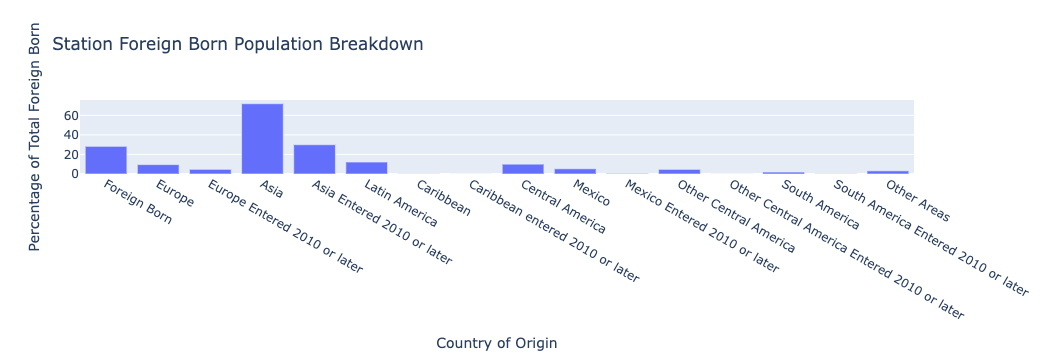

In [165]:
stn_chart19(stop = delmar) 

,Country of Origin,Percentage of Total Foreign Born
40,Foreign Born,35.99826
41,Europe,2.90074
42,Europe Entered 2010 or later,0.830941
43,Asia,66.369542
44,Asia Entered 2010 or later,11.164829
45,Latin America,30.321801
46,Caribbean,0.211512
47,Caribbean entered 2010 or later,0.120864
48,Central America,28.992295
49,Mexico,20.985043


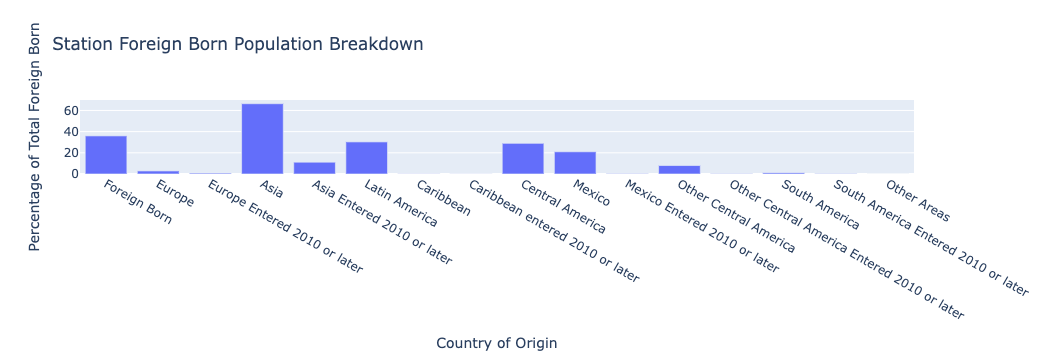

In [166]:
stn_chart19(stop=chinatown)

,Country of Origin,Percentage of Total Foreign Born
40,Foreign Born,28.319389
41,Europe,9.601798
42,Europe Entered 2010 or later,4.784843
43,Asia,71.901092
44,Asia Entered 2010 or later,29.961464
45,Latin America,12.26718
46,Caribbean,0.192678
47,Caribbean entered 2010 or later,0.0
48,Central America,10.083494
49,Mexico,5.330764


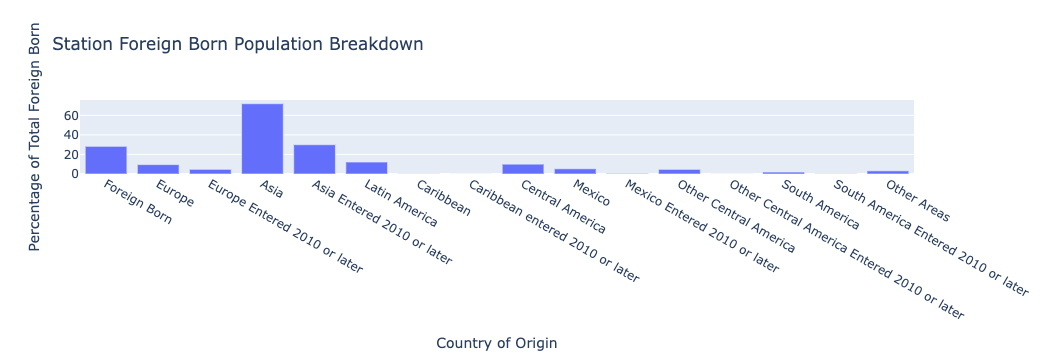

,Country of Origin,Percentage of Total Foreign Born
40,Foreign Born,35.99826
41,Europe,2.90074
42,Europe Entered 2010 or later,0.830941
43,Asia,66.369542
44,Asia Entered 2010 or later,11.164829
45,Latin America,30.321801
46,Caribbean,0.211512
47,Caribbean entered 2010 or later,0.120864
48,Central America,28.992295
49,Mexico,20.985043


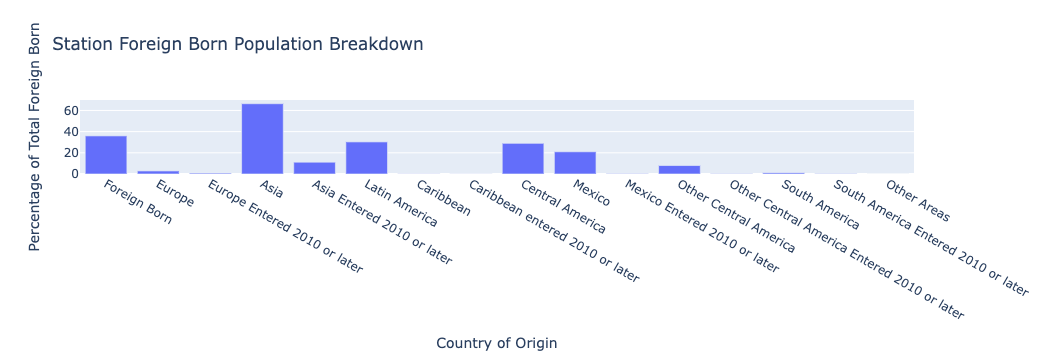

In [170]:
# list of neighborhoods
stations = [delmar, chinatown]

# call the function with a loop
for station in stations:
        stn_chart19(stop=station)